In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
model = load_model("best_model.keras")


Probando con ../Data/AAPL.csv
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step
MAE: 0.02304668089469857, MSE: 0.0008207228759533744


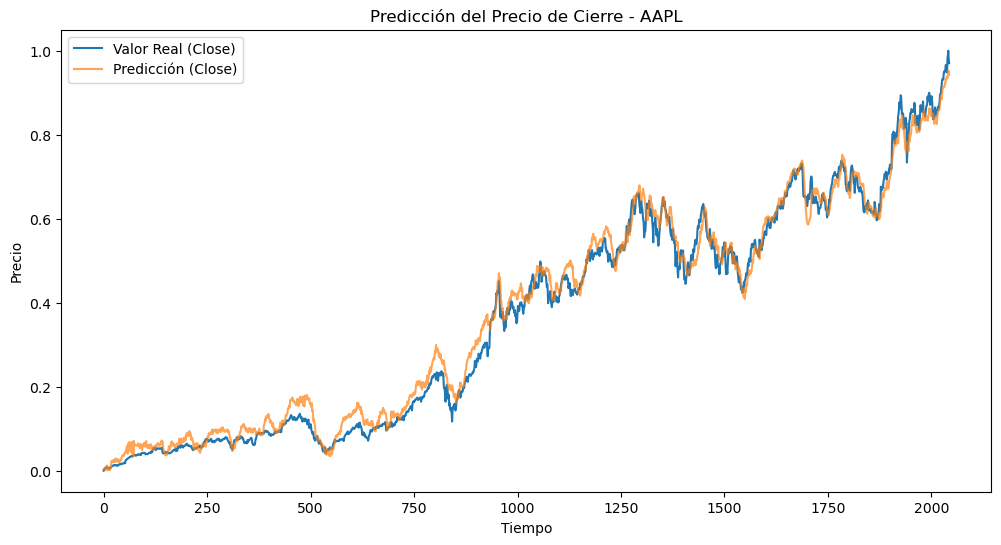


Probando con ../Data/AMZN.csv
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step
MAE: 0.02798702421676276, MSE: 0.0013693725620040234


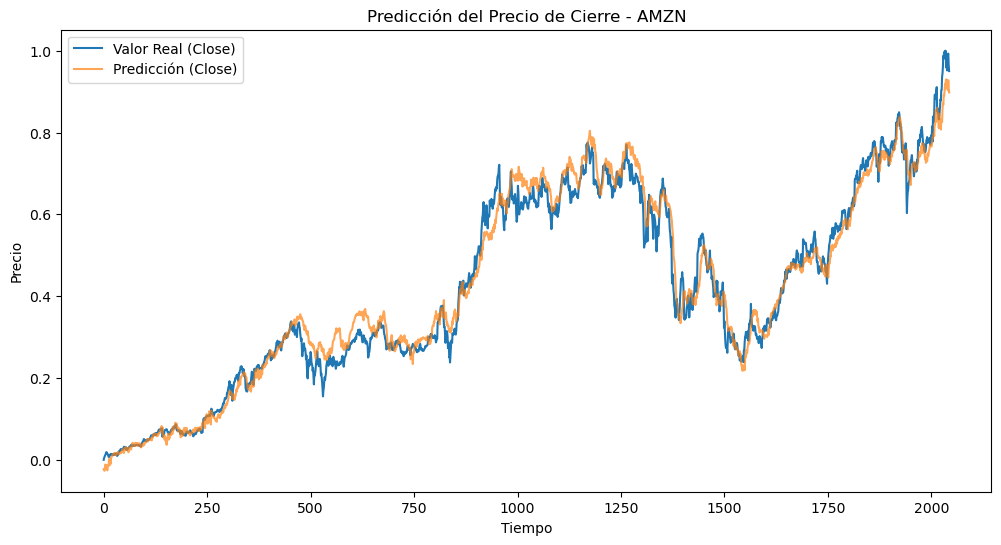


Probando con ../Data/GOOGL.csv
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step
MAE: 0.021121816308669123, MSE: 0.000785898272839411


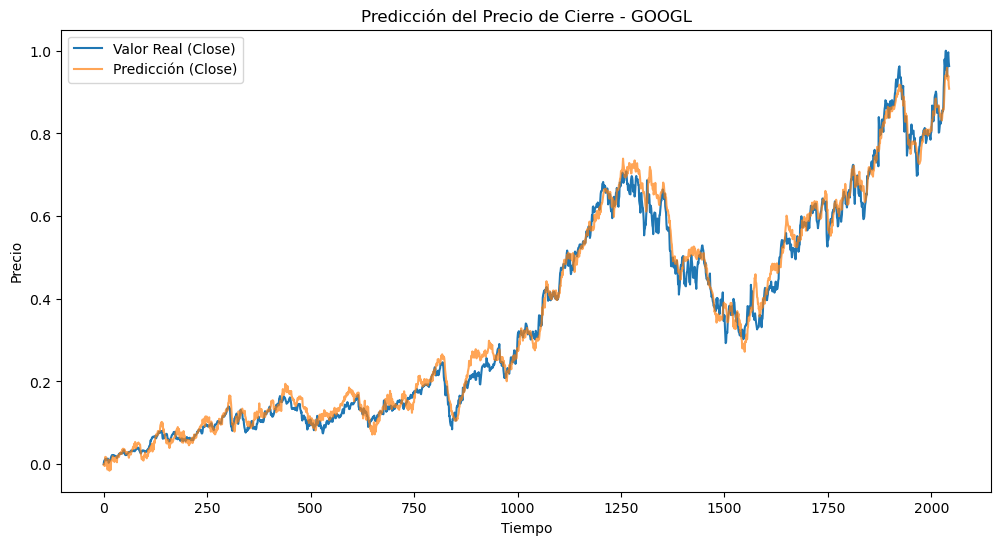

In [25]:
# Parámetros del modelo
TIME_STEPS = 20  # Ventana de tiempo
FEATURES = 10  # Cantidad de características esperadas

# Lista de archivos CSV
datasets = ["../Data/AAPL.csv", "../Data/AMZN.csv", "../Data/GOOGL.csv"]

# Procesar cada dataset
for file in datasets:
    print(f"\nProbando con {file}")

    # Cargar datos
    df = pd.read_csv(file)

    # Asegurar que la columna de fecha no se usa como dato
    if 'Date' in df.columns:
        df = df.drop(columns=['Date'])

    # Separar características y target
    target_column = "Close"  
    feature_columns = [col for col in df.columns]  # Mantener todas las columnas en X

    X = df[feature_columns].values
    y = df[target_column].values.reshape(-1, 1)  # Asegurar la forma correcta

    # Normalizar los datos con MinMaxScaler entre 0 y 1
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)

    scaler_y = StandardScaler()
    y_scaled = scaler_y.fit_transform(y)

    # Función para crear secuencias de entrada con TIME_STEPS
    def create_sequences(X, y, time_steps):
        Xs, ys = [], []
        for i in range(len(X) - time_steps):
            Xs.append(X[i : i + time_steps])
            ys.append(y[i + time_steps])
        return np.array(Xs), np.array(ys)

    # Crear secuencias de entrada
    X_test_seq, y_test_seq = create_sequences(X_scaled, y_scaled, TIME_STEPS)

    # Hacer predicciones con el modelo
    y_pred_scaled = model.predict(X_test_seq)

    # Desescalar correctamente
    y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_test_original = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

    # Cálculo de errores
    mse_error = mean_squared_error(y_test_original, y_pred_original)
    mae_error = mean_absolute_error(y_test_original, y_pred_original)
    
    print(f"MAE: {mae_error}, MSE: {mse_error}")
    
    # Graficar los resultados
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_original, label="Valor Real (Close)")
    plt.plot(y_pred_original, label="Predicción (Close)", alpha=0.7)
    plt.title(f"Predicción del Precio de Cierre - {file.split('/')[-1].split('.')[0]}")
    plt.xlabel("Tiempo")
    plt.ylabel("Precio")
    plt.legend()
    plt.show()